***This cell will allow us to upload the jpg file***

In [2]:
#First we import some important Python modules.
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv
from matplotlib.image import imread

#Read in the image.
A  = imread(r"mountain.jpg")   

print('The shape of the image file is :', np.shape(A))

The shape of the image file is : (266, 474, 3)


***In this cell, we will create a copy of the image and convert it to grayscale. Then, we'll find the shape and number of pixels.***

In [2]:
#Convert the array to grayscale (black and white)
X = np.mean(A,-1)
(m,n) = np.shape(X)

#Display the shape
print('The shape of the BW image is ', (m,n)) 
TotPix = m*n

#Display total pixels
print('The total number of pixels of this image is: ', TotPix)
print('The value of the pixel in position (100,200) is :', str(X[100,200]))

The shape of the BW image is  (266, 474)
The total number of pixels of this image is:  126084
The value of the pixel in position (100,200) is : 12.333333333333334


***Now, we'll display the color image with the grayscale image.***

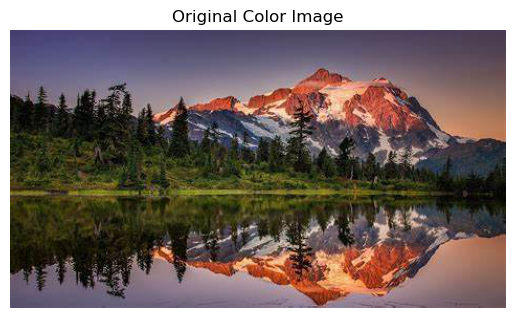

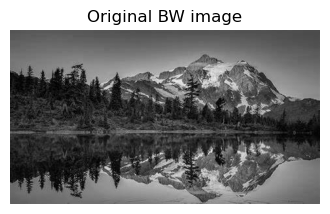

In [3]:
#Display original color image
plt.figure(1)
plt.rcParams['figure.figsize'] = [4,8]
img = plt.imshow(A)
plt.axis('off')
plt.title('Original Color Image')

#Display original BW image
plt.figure(2)
plt.rcParams['figure.figsize'] = [4,8]
img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.title('Original BW image')

plt.show()

***In this cell we'll move the images to be side-by-side so they are easier to compare.***

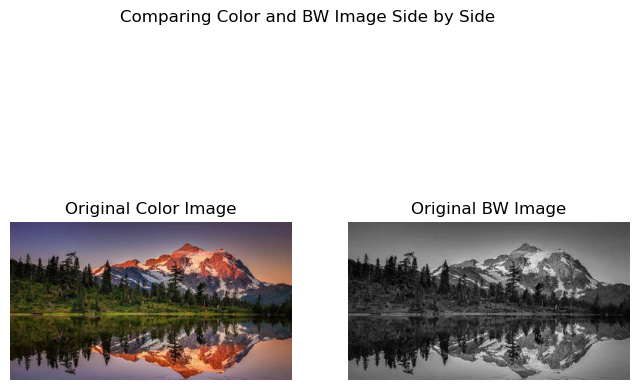

In [4]:
#Create a subplot to compare original color image with the grayscale version
fig, axarr = plt.subplots(nrows=1, ncols=2, figsize=(8, 6))
plt.suptitle('Comparing Color and BW Image Side by Side ')

K =[0,1]
for ax, k in zip(axarr.ravel(), K):
     if k == 0:
          ax.imshow(A)
          ax.set_title('Original Color Image')
          ax.axis('off')
     else:
          ax.imshow(X, cmap='gray')
          ax.set_title('Original BW Image')
          ax.axis('off')

plt.show()

***Next, we want to compute the SVD of the black and white image and find the shapes of the matrices.***

In [5]:
#Compute the SVD of the matrix (image) X and display the shapes of the matrices
U,S,VT = np.linalg.svd(X,full_matrices=False)
print('The shape of the matrix X is :', np.shape(X))
print('The shape of the matrix U is :', np.shape(U))
print('The shape of the matrix VT is :', np.shape(VT))
print('The shape of the matrix S is :', np.shape(S))
S = np.diag(S)

print('After using np.diag(S), the new shape of S is :', np.shape(S))

The shape of the matrix X is : (266, 474)
The shape of the matrix U is : (266, 266)
The shape of the matrix VT is : (266, 474)
The shape of the matrix S is : (266,)
After using np.diag(S), the new shape of S is : (266, 266)


***We will now compare the SVD image with the original image (both grayscale).***

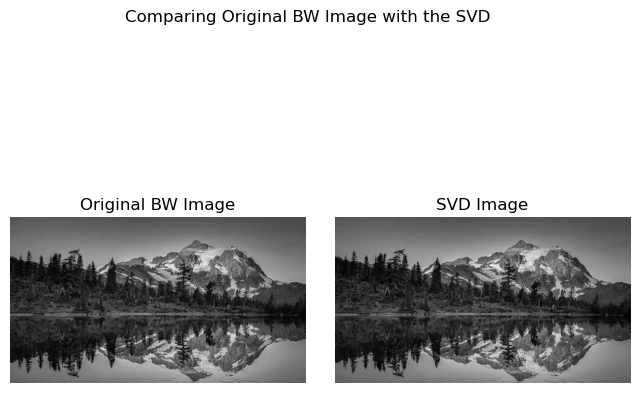

In [6]:
# Create a subplot to compare original BW image with the SVD version 
fig, axarr = plt.subplots(nrows=1, ncols=2, figsize=(8, 6))
plt.subplots_adjust( wspace=0.1, hspace= 0)
plt.suptitle('Comparing Original BW Image with the SVD ')

K =[0,1]
for ax, k in zip(axarr.ravel(), K):
     if k == 0:
          ax.imshow(X, cmap='gray')
          ax.set_title('Original BW Image')
          ax.axis('off')
     else:
          ax.imshow(U@S@VT, cmap='gray')
          ax.set_title('SVD Image')
          ax.axis('off')

plt.show()

***The next step is to test with different values of "r" so we can visualize the difference in image quality. Next to each "r" value the estimated savings will be output for each image.***

Savings are calculated as a percentage with $S = 100 - \frac{(100*(r*(m2+n2+1)))}{(m*n)}  $

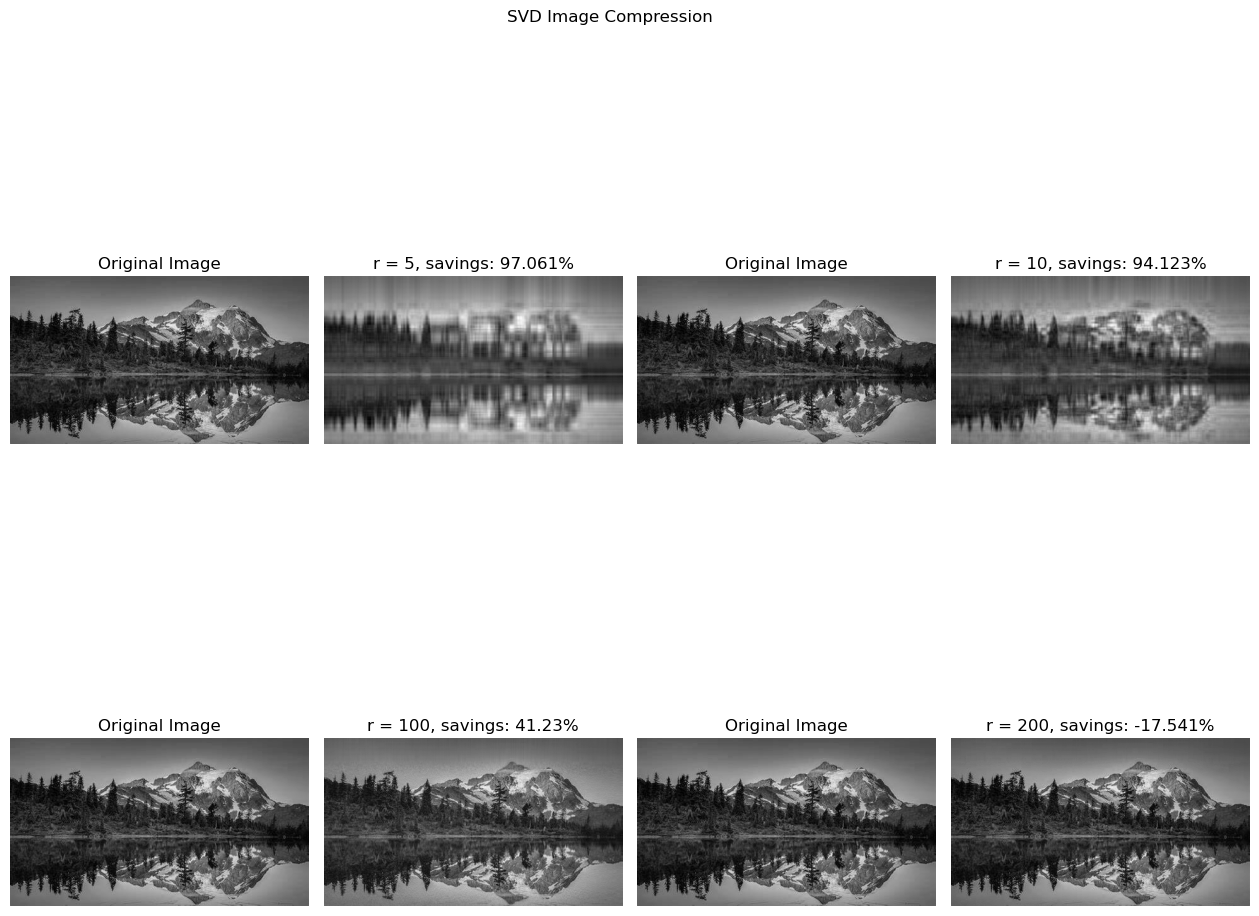

In [7]:
# Create a subplot to compare original BW image with several approximations
fig, axarr = plt.subplots(nrows=2, ncols=4, figsize=(16, 12))
plt.subplots_adjust( wspace=0.05, hspace=0)
plt.suptitle('SVD Image Compression')

# List the values of "r" that will be used.
R=[0, 5, 0 , 10, 0, 100, 0, 200]

# Create a loop on the subplots and values of r
for ax, r in zip(axarr.ravel(), R): 
    Xapprox = U[:,:r] @ S[:r,:r] @ VT[:r,:]
    if r == 0:
        Xapprox = (X)
        ax.imshow(Xapprox, cmap='gray')
        ax.axis('off')
        ax.set_title('Original Image')
    else:
        ax.imshow(Xapprox, cmap='gray')
        ax.axis('off')
        (m2,n2) = np.shape(Xapprox)
        ax.set_title('r = ' + str(r) + ', savings: ' + str((round(100-(100*((r*(m2+n2+1))/(int(np.shape(X)[1])*(int(np.shape(X)[0]))))),3))) + '%')
plt.show()

***Now we will move on to color images. This next cell shows the image with red, blue, and green colors separated.***

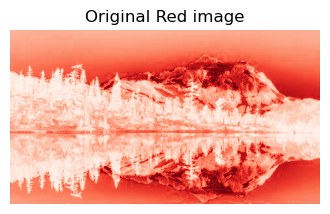

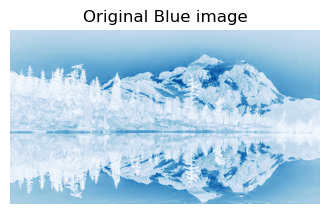

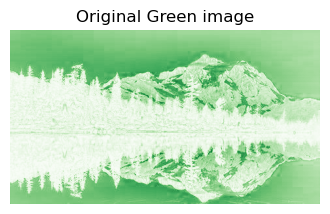

In [8]:
#Plot reds.
plt.figure(3)
plt.rcParams['figure.figsize'] = [4,8]
imgr = plt.imshow(A[:, :, 0])
imgr.set_cmap('Reds')
plt.axis('off')
plt.title('Original Red image')

#Plot blues.
plt.figure(4)
plt.rcParams['figure.figsize'] = [4,8]
imgb = plt.imshow(A[:, :, 1])
imgb.set_cmap('Blues')
plt.axis('off')
plt.title('Original Blue image')

#Plot greens.
plt.figure(5)
plt.rcParams['figure.figsize'] = [4,8]
imgg = plt.imshow(A[:, :, 2])
imgg.set_cmap('Greens')
plt.axis('off')
plt.title('Original Green image')

plt.show()

***Let's move them side-by-side so they are easier to see.***

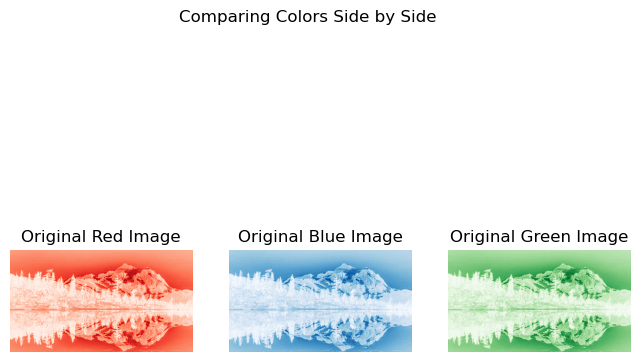

In [9]:
fig, axarr = plt.subplots(nrows=1, ncols=3, figsize=(8, 6))
plt.suptitle('Comparing Colors Side by Side ')

K =[0,1,2]

for ax, k in zip(axarr.ravel(), K):
     if k == 0:
          ax.imshow(X, cmap='Reds')
          ax.set_title('Original Red Image')
          ax.axis('off')
     elif k == 1:
          ax.imshow(X, cmap='Blues')
          ax.set_title('Original Blue Image')
          ax.axis('off')
     else:
          ax.imshow(X, cmap='Greens')
          ax.set_title('Original Green Image')
          ax.axis('off')

plt.show()

***In this next cell, we find U, S, and VT for the red, blue, and green images.***

In [10]:
#For red.
Ur,Sr,VTr = np.linalg.svd(A[:, :, 0],full_matrices=False)
Sr = np.diag(Sr)

#For blue.
Ub,Sb,VTb = np.linalg.svd(A[:, :, 1],full_matrices=False)
Sb = np.diag(Sb)

#For green.
Ug,Sg,VTg = np.linalg.svd(A[:, :, 2],full_matrices=False)
Sg = np.diag(Sg)

***Let's compare the SVD image for red with the original red image using different "r" values.***

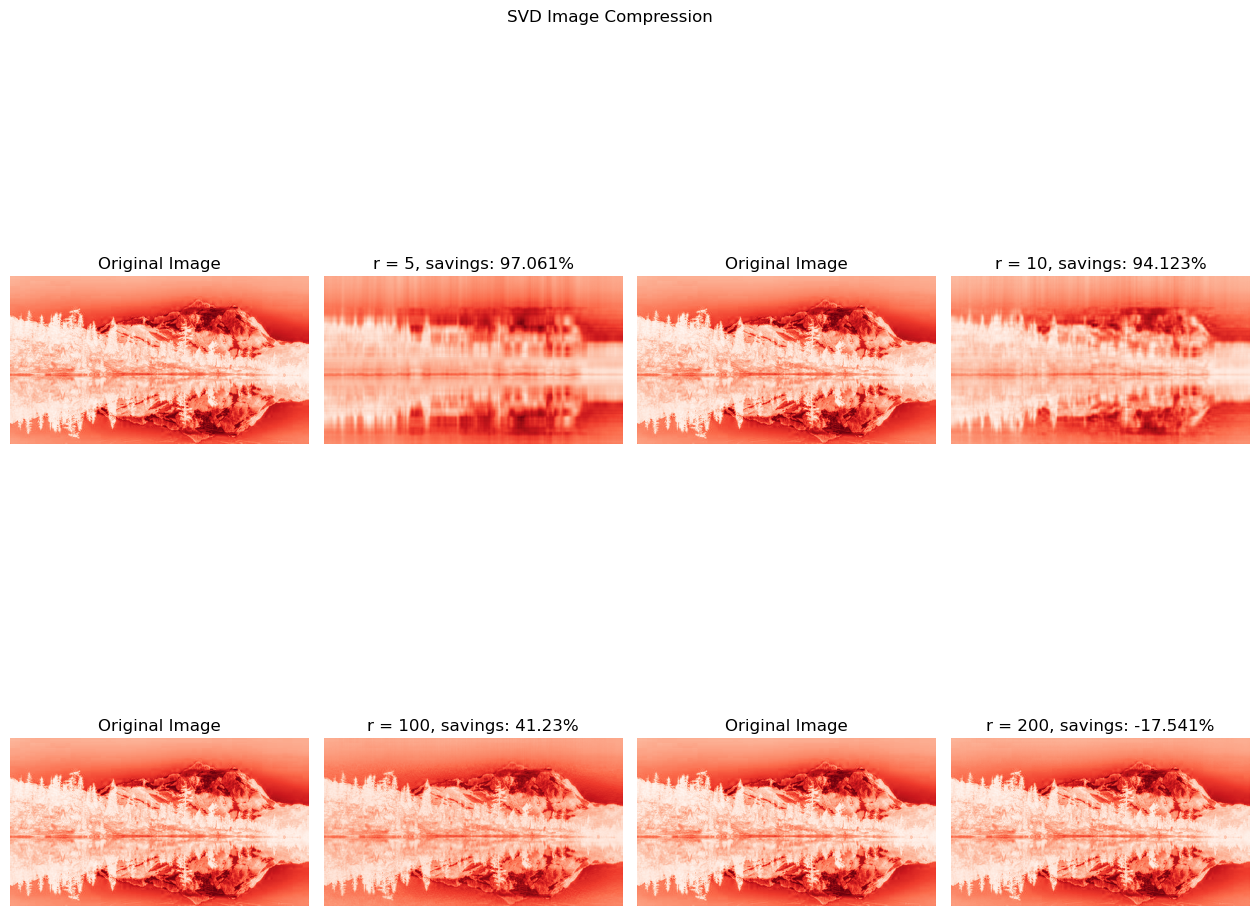

In [11]:
fig, axarr = plt.subplots(nrows=2, ncols=4, figsize=(16, 12))
plt.subplots_adjust( wspace=0.05, hspace=0)
plt.suptitle('SVD Image Compression')

# List the values of "r" that will be used.
R=[0, 5, 0 , 10, 0, 100, 0, 200]

# Create a loop on the subplots and values of r
for ax, r in zip(axarr.ravel(), R): 
    Xapproxr = Ur[:,:r] @ Sr[:r,:r] @ VTr[:r,:]
    if r == 0:
        Xapproxr = (A[:, :, 0])
        ax.imshow(Xapproxr, cmap='Reds')
        ax.axis('off')
        ax.set_title('Original Image')
    else:
        ax.imshow(Xapproxr, cmap='Reds')
        ax.axis('off')
        (m2,n2) = np.shape(Xapproxr)
        ax.set_title('r = ' + str(r) + ', savings: ' + str((round(100-(100*((r*(m2+n2+1))/(int(np.shape(A[:, :, 0])[1])*(int(np.shape(A[:, :, 0])[0]))))),3))) + '%')
plt.show()

***Let's compare the SVD image for blue with the original blue image using different "r" values.***

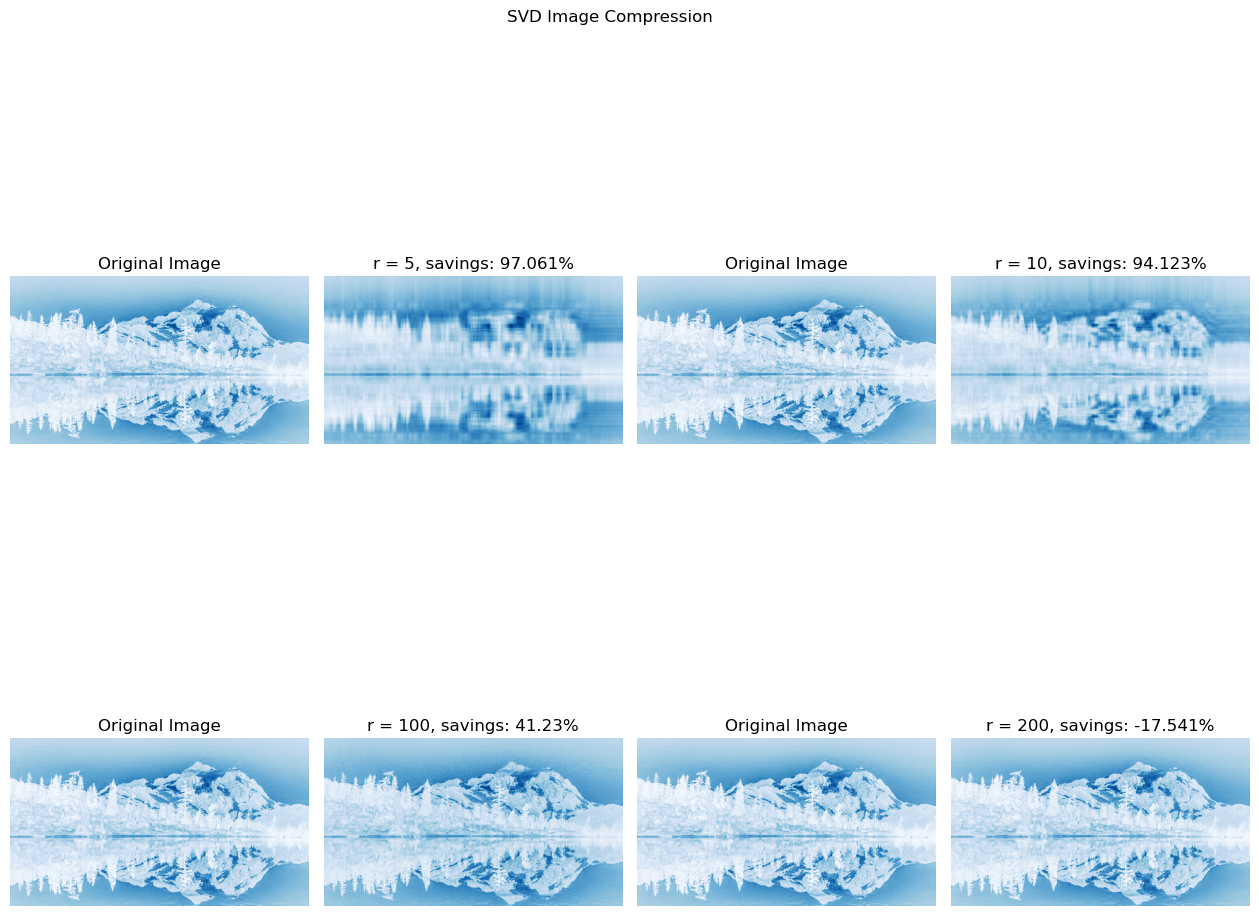

In [12]:
fig, axarr = plt.subplots(nrows=2, ncols=4, figsize=(16, 12))
plt.subplots_adjust( wspace=0.05, hspace=0)
plt.suptitle('SVD Image Compression')

# List the values of "r" that will be used.
R=[0, 5, 0 , 10, 0, 100, 0, 200]

# Create a loop on the subplots and values of r
for ax, r in zip(axarr.ravel(), R): 
    Xapproxb = Ub[:,:r] @ Sb[:r,:r] @ VTb[:r,:]
    if r == 0:
        Xapproxb = (A[:, :, 1])
        ax.imshow(Xapproxb, cmap='Blues')
        ax.axis('off')
        ax.set_title('Original Image')
    else:
        ax.imshow(Xapproxb, cmap='Blues')
        ax.axis('off')
        (m2,n2) = np.shape(Xapproxb)
        ax.set_title('r = ' + str(r) + ', savings: ' + str((round(100-(100*((r*(m2+n2+1))/(int(np.shape(A[:, :, 1])[1])*(int(np.shape(A[:, :, 1])[0]))))),3))) + '%')
plt.show()

***Let's compare the SVD image for green with the original green image using different "r" values.***

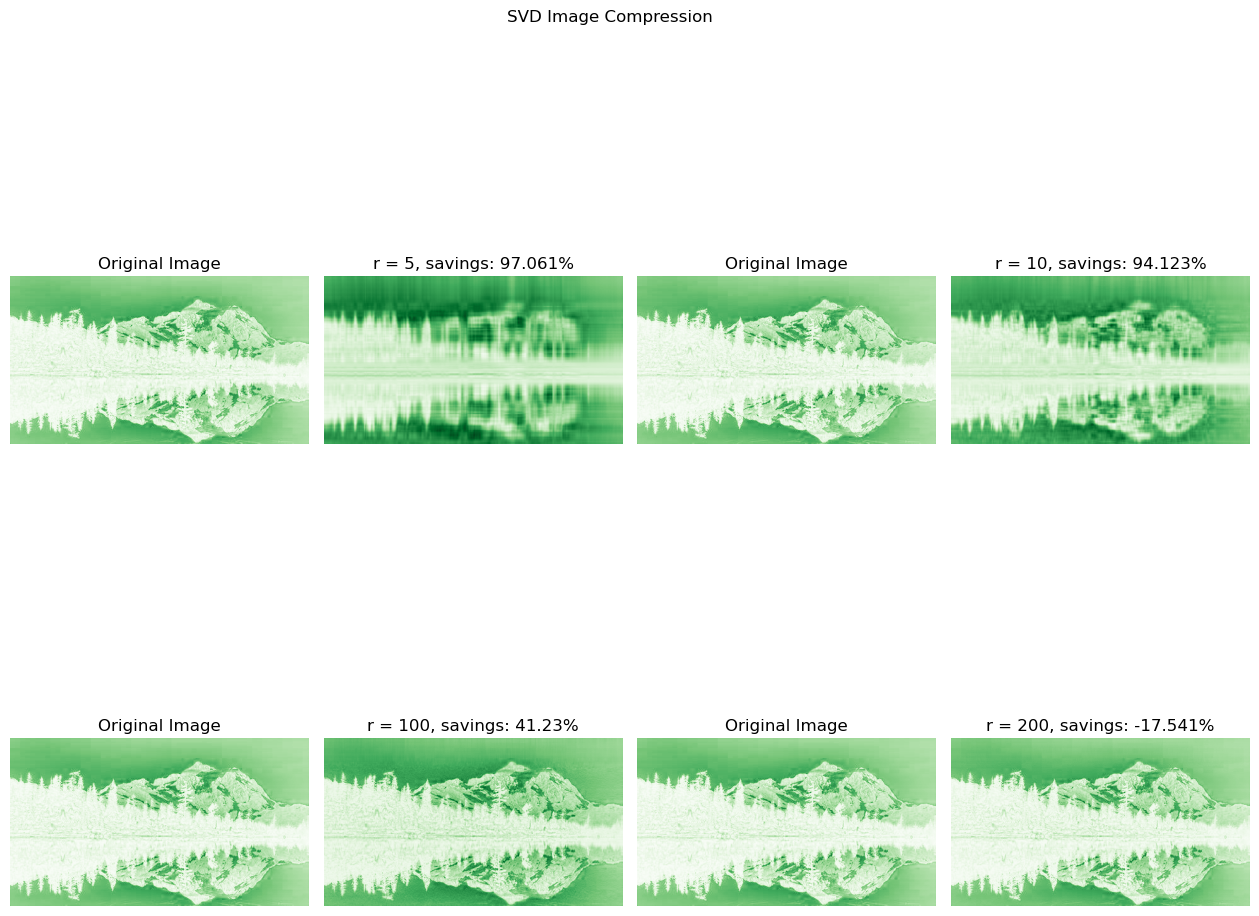

In [13]:
fig, axarr = plt.subplots(nrows=2, ncols=4, figsize=(16, 12))
plt.subplots_adjust( wspace=0.05, hspace=0)
plt.suptitle('SVD Image Compression')

# List the values of "r" that will be used.
R=[0, 5, 0 , 10, 0, 100, 0, 200]

# Create a loop on the subplots and values of r
for ax, r in zip(axarr.ravel(), R): 
    Xapproxg = Ug[:,:r] @ Sg[:r,:r] @ VTg[:r,:]
    if r == 0:
        Xapproxg = (A[:, :, 2])
        ax.imshow(Xapproxg, cmap='Greens')
        ax.axis('off')
        ax.set_title('Original Image')
    else:
        ax.imshow(Xapproxg, cmap='Greens')
        ax.axis('off')
        (m2,n2) = np.shape(Xapproxg)
        ax.set_title('r = ' + str(r) + ', savings: ' + str((round(100-(100*((r*(m2+n2+1))/(int(np.shape(A[:, :, 2])[1])*(int(np.shape(A[:, :, 2])[0]))))),3))) + '%')
plt.show()

***Finally, we will combine the red, blue, and green SVD matrices to make one [:,:,3] rgb image and compare it to the original color image we read in.***

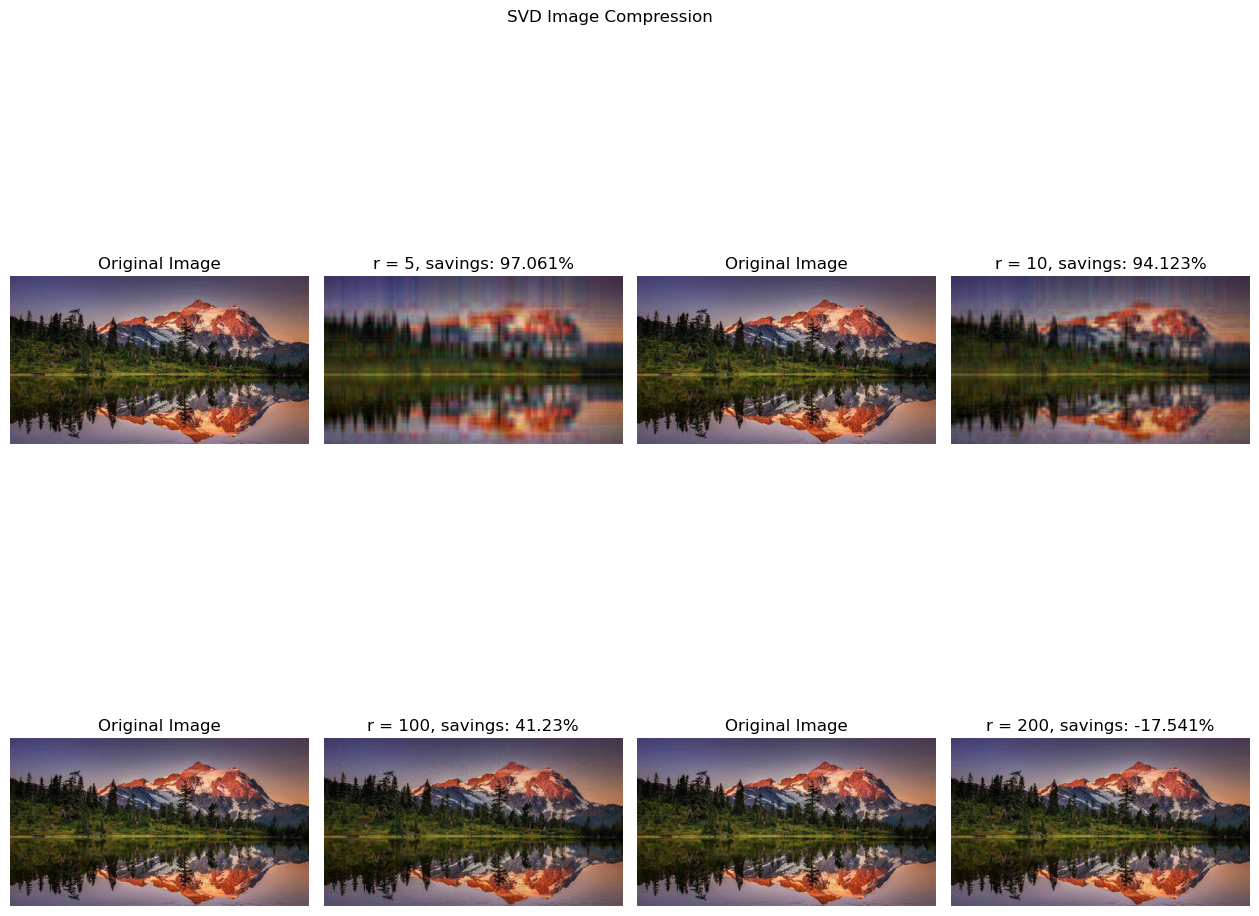

In [14]:
fig, axarr = plt.subplots(nrows=2, ncols=4, figsize=(16, 12))
plt.subplots_adjust( wspace=0.05, hspace=0)
plt.suptitle('SVD Image Compression')

#List the values of "r" that will be used.
R=[0, 5, 0 , 10, 0, 100, 0, 200]

#Create a new Xapprox in the shape of the original image A.
XR = np.zeros(np.shape(A))

# Create a loop on the subplots and values of r
for ax, r in zip(axarr.ravel(), R): 
    
    #Redefine each colors Xapprox to the correct values.
    Xapproxr = Ur[:,:r] @ Sr[:r,:r] @ VTr[:r,:]  
    Xapproxb = Ub[:,:r] @ Sb[:r,:r] @ VTb[:r,:]  
    Xapproxg = Ug[:,:r] @ Sg[:r,:r] @ VTg[:r,:]  
    
    #Set each column of XR to the different color values.
    XR[:, :, 0] = Xapproxr
    XR[:, :, 1] = Xapproxb
    XR[:, :, 2] = Xapproxg
    
    if r == 0:
        ax.imshow(A)
        ax.axis('off')
        ax.set_title('Original Image')
    else:
        XR = XR/np.amax(XR)
        XR = np.clip(XR, 0 ,1)
        ax.imshow(XR)
        ax.axis('off')
        (m2,n2) = np.shape(XR[:,:,0]*3)
        ax.set_title('r = ' + str(r) + ', savings: ' + str((round(100-(100*((r*(m2+n2+1))/(int(np.shape(A)[1])*(int(np.shape(A)[0]))))),3))) + '%')
plt.show()

***In conclusion, SVD's can be extremely useful in the world of image compression. As we have seen with the dog.jpg example, we can have savings upwards of 70% while still keeping the visual quality nearly identical to the human eye.***

In [ ]:
#For Exam 2 not Assignment 8
A1 = np.zeros((2,2))
A1[0,0] = 4.1
A1[0,1] = 2.8
A1[1,0] = 9.7
A1[1,1] = 6.6

U1, S1, VT1 = np.linalg.svd(A1,full_matrices=True)
print("U is", U1)
print("S is", S1)
print("VT is", VT1)
print("Condition number is", S1[0]/S1[1])

A2 = np.zeros((2,2))
A2[0,0] = 4.1
A2[0,1] = 2.8
A2[1,0] = 9.675
A2[1,1] = 6.608

U2, S2, VT2 = np.linalg.svd(A2,full_matrices=True)
print("U is", U2)
print("S is", S2)
print("VT is", VT2)
print("Condition number is", S2[0]/S2[1])